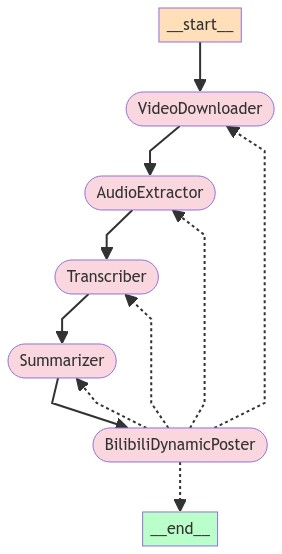

{'VideoDownloader': {'video': '已完成'}}
----
{'AudioExtractor': {'audio': '已完成'}}
----
{'Transcriber': {'text': '已完成'}}
----
{'Summarizer': {'summary': '已完成'}}
----
{'BilibiliDynamicPoster': {'dynamic': True}}
----


In [2]:
from typing import Annotated, Sequence, TypedDict
from langgraph.graph import END, StateGraph, START

class MyState(TypedDict):
    video: str
    audio: str
    text: str
    summary: str
    dynamic: bool

def download_video_node(state: MyState):
    # 下载视频
    return {"video": "已完成"}

def video_2_audio_node(state: MyState):
    # 视频转音频
    return {"audio": "已完成"}

def audio_2_text_node(state: MyState):
    # 音频转换为文本
    return {"text": "已完成"}

def text_2_summary_node(state: MyState):
    # 文本摘要
    return {"summary": "已完成"}

def send_bilibili_dynamic(state: MyState):
    # 发布 bilibili 动态
    return {"dynamic": True}

def retry_send_bilibili_dynamic(state: MyState):
    # 错误重试
    dynamic = state["dynamic"]
    if dynamic:
        return END
    else:
        return START

workflow = StateGraph(MyState)
workflow.add_node("VideoDownloader", download_video_node)
workflow.add_node("AudioExtractor", video_2_audio_node)
workflow.add_node("Transcriber", audio_2_text_node)
workflow.add_node("Summarizer", text_2_summary_node)
workflow.add_node("BilibiliDynamicPoster", send_bilibili_dynamic)

workflow.set_entry_point("VideoDownloader")
workflow.add_edge("VideoDownloader", "AudioExtractor")
workflow.add_edge("AudioExtractor", "Transcriber")
workflow.add_edge("Transcriber", "Summarizer")
workflow.add_edge("Summarizer", "BilibiliDynamicPoster")

# 动态发布错误，重试
workflow.add_conditional_edges(source="BilibiliDynamicPoster", path=retry_send_bilibili_dynamic)

# 编译工作流图
graph = workflow.compile()

from IPython.display import Image, display
# 画出工作流图
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

input = {
    "video": "未完成",
    "audio": "未完成",
    "text": "未完成",
    "summary": "未完成",
    "dynamic": False,
}
# 执行工作流图，流式输出
events = graph.stream(input)
for s in events:
    print(s)
    print("----")